# Phishing Analysis

What is Phishing?

According to Phishing.org:

Phishing is a cybercrime in which a target or targets are contacted by email, telephone or text message by someone posing as a legitimate institution to lure individuals into providing sensitive data such as personally identifiable information, banking and credit card details, and passwords.



# This dataset is a collection oh Phishing URL and agents atttacking Companies over a span of 8 years. Starting from 2012 to 2020.

In [242]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets



In [219]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,12

In [218]:
odf = pd.read_csv('D:/Moveworks/online.csv')


In [222]:
odf.loc[:, 'submission_time'] = pd.to_datetime(odf.loc[:, 'submission_time'])
odf.loc[:, 'verification_time'] = pd.to_datetime(odf.loc[:, 'verification_time'])


odf['delta'] = odf['verification_time'] - odf['submission_time']

# How much time does it require for a company to verify a Phishing attack?

In [241]:
pd.DataFrame(odf.delta.describe()).head(10)


,delta
count,12568
mean,9 days 03:54:18.677036
std,52 days 07:07:34.796508
min,0 days 00:00:13
25%,0 days 00:05:10
50%,0 days 00:38:35.500000
75%,4 days 13:06:54.500000
max,2241 days 20:01:11


In [240]:
unique_attacks=odf['phish_id'].nunique()

In [224]:
minimum= odf.delta.min()
maximum=odf.delta.max()
avg_days=odf.delta.mean()


In [221]:
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: orange; font-size:20px;'> Avgerage number of days requried to verify atttack: "  + str(avg_days) +"</span>" +
             "<span style='color: red; font-size:20px;margin-left:30px;'> unique_attacks: " + str(unique_attacks) + "</span>"+
             "<span style='color: red; font-size:20px; margin-left:20px;'> Maximum days required to verify an attack " + str(maximum) + "</span>"+
             "</div>")
       )

In [226]:
odf['delta_int'] = odf['delta'].values.astype(np.int64)

In [227]:
top10=odf['target'].value_counts().head(11)
top10 = pd.DataFrame(top10)
top10 = top10.reset_index()
top10.columns = ['Companies', 'attacks']

In [228]:
# get a list of all the column names 
indexNamesArr = top10.Companies.values

In [229]:
top10=top10[top10.Companies.isin(['PayPal', 'Microsoft', 'Facebook', 'RuneScape',
       'eBay, Inc.', 'Three', 'Steam', 'Google', 'Allegro', 'Orange'])]

In [230]:
# sorting the values by confirmed descednding order
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: yellow'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 0] = y
    df1.iloc[:, 1] = r

    
    return df1

def show_latest_cases(n):
    n = int(n)
    return top10.sort_values('attacks', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)


interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# Top 10 Phishing Target Brands

In [231]:
def bubble_chart(n):
    fig = px.scatter(top10.head(n), x="Companies", y="attacks", size="attacks", color="Companies",
               hover_name="Companies", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit Companies by Phishing attacks",
    xaxis_title="Companies",
    yaxis_title="Attacks",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [232]:
odf.groupby(['target']).size().sort_values()

odf['year'] = pd.DatetimeIndex(odf['submission_time']).year

# How  the attacks on target brands have trended over years

In [233]:
gg=pd.DataFrame(odf.groupby(['year','target']).size().sort_values(ascending=False))
gg = gg.reset_index()
gg.columns = ['Year', 'Companies','Attacks']


In [234]:
gg=gg[gg.Companies.isin(['PayPal', 'Microsoft', 'Facebook', 'RuneScape',
       'eBay, Inc.', 'Three', 'Steam', 'Google', 'Allegro', 'Orange'])]


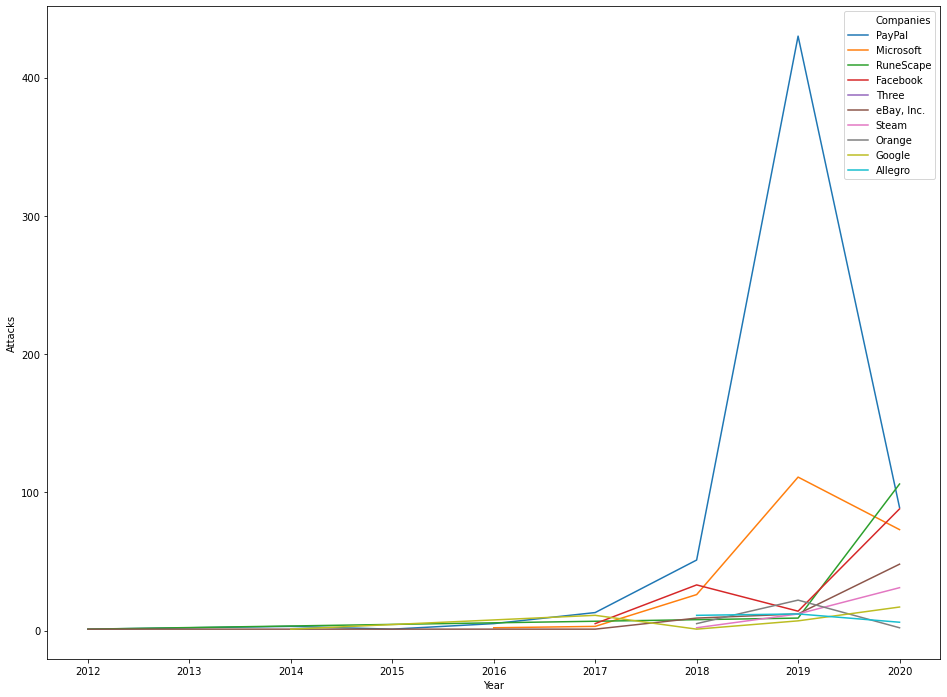

<Figure size 14400x25920 with 0 Axes>

<Figure size 14400x25920 with 0 Axes>

In [235]:
sns.lineplot(x="Year", y="Attacks", hue="Companies", data=gg)
plt.show()
plt.figure(figsize=(200, 360))


# Paypal has been the most Targeted Brand 

In [236]:
topBrand= gg[gg.Companies.isin(['PayPal'])]

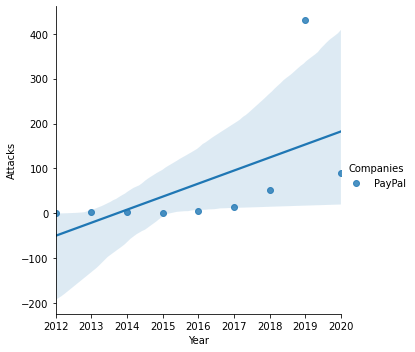

In [237]:
sns.lmplot(x="Year", y="Attacks", hue="Companies", data=topBrand)
plt.show()

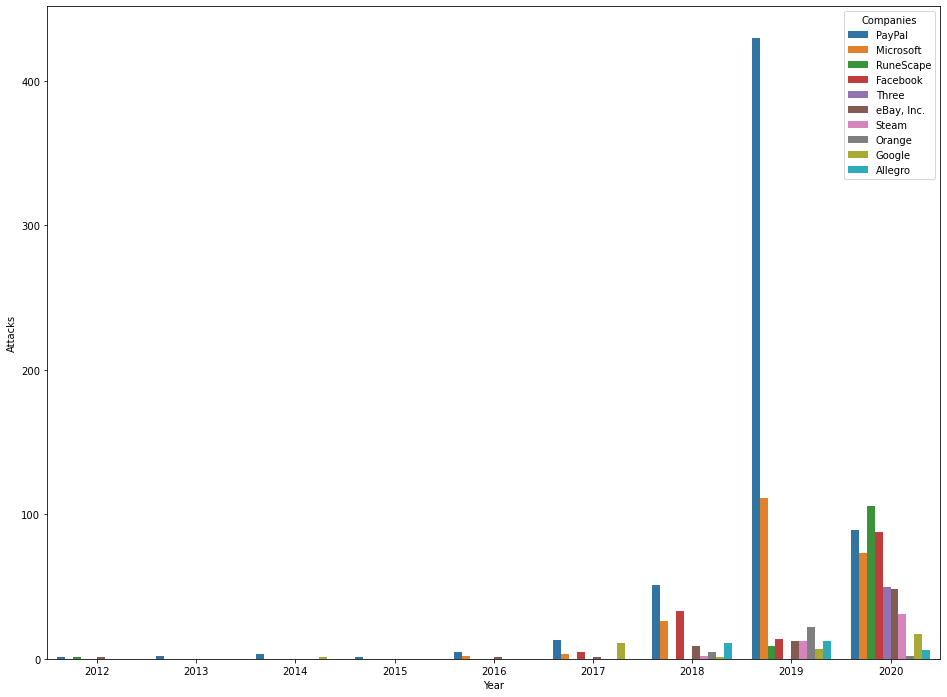

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [238]:
sns.barplot(x="Year", hue="Companies", y="Attacks", data=gg)
plt.show()
plt.figure(figsize=(8, 6))